# Thyroid Prediction Model using Machine learning

In [ ]:
#Import Required Libraries

In [1]:
import pandas as pd # data Manipulation
import numpy as np # Numeric Calculation
import matplotlib.pyplot as plt # data Visualization.
import seaborn as sns #advance Visualization
import dtale # auto EDA
from sklearn.pipeline import Pipeline # Building Light weight Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, OneHotEncoder # Normalization
from sklearn.impute import SimpleImputer #Missing value Impute
import joblib # dumb the File

In [4]:
T = pd.read_csv(r"C:\Users\HP\Data_science_project\thyroidproject\project_ineuron\hypothyroid1.csv")

In [5]:
T

,age,sex,on thyroxine,query on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,query hypothyroid,...,TT4 measured,TT4,T4U measured,T4U,FTI measured,FTI,TBG measured,TBG,referral source,binaryClass
0,41.0,F,f,f,f,f,f,f,f,f,...,t,125.0,t,1.14,t,109.0,f,0,SVHC,P
1,23.0,F,f,f,f,f,f,f,f,f,...,t,102.0,f,NaN,f,NaN,f,0,other,P
2,46.0,M,f,f,f,f,f,f,f,f,...,t,109.0,t,0.91,t,120.0,f,0,other,P
3,70.0,F,t,f,f,f,f,f,f,f,...,t,175.0,f,NaN,f,NaN,f,0,other,P
4,70.0,F,f,f,f,f,f,f,f,f,...,t,61.0,t,0.87,t,70.0,f,0,SVI,P
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3767,30.0,F,f,f,f,f,f,f,f,f,...,f,NaN,f,NaN,f,NaN,f,0,other,P
3768,68.0,F,f,f,f,f,f,f,f,f,...,t,124.0,t,1.08,t,114.0,f,0,SVI,P
3769,74.0,F,f,f,f,f,f,f,f,f,...,t,112.0,t,1.07,t,105.0,f,0,other,P
3770,72.0,M,f,f,f,f,f,f,f,f,...,t,82.0,t,0.94,t,87.0,f,0,SVI,P


In [4]:
T['binaryClass'].value_counts() # count the value of the output class

P    3481
N     291
Name: binaryClass, dtype: int64

In [5]:
# split the data into Target and predictors.
X = T.iloc[:, :29]
Y = T.loc[:, ['binaryClass']]

In [6]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3772 entries, 0 to 3771
Data columns (total 29 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   age                        3771 non-null   float64
 1   sex                        3622 non-null   object 
 2   on thyroxine               3772 non-null   object 
 3   query on thyroxine         3772 non-null   object 
 4   on antithyroid medication  3772 non-null   object 
 5   sick                       3772 non-null   object 
 6   pregnant                   3772 non-null   object 
 7   thyroid surgery            3772 non-null   object 
 8   I131 treatment             3772 non-null   object 
 9   query hypothyroid          3772 non-null   object 
 10  query hyperthyroid         3772 non-null   object 
 11  lithium                    3772 non-null   object 
 12  goitre                     3772 non-null   object 
 13  tumor                      3772 non-null   objec

In [7]:
#### Separating Numeric and Non-Numeric columns

In [8]:
num_features = X.select_dtypes(exclude = ['object']).columns
cat_features = X.select_dtypes(include = ['object']).columns

In [9]:
print(num_features)
print(cat_features)

Index(['age', 'TSH', 'T3', 'TT4', 'T4U', 'FTI', 'TBG'], dtype='object')
Index(['sex', 'on thyroxine', 'query on thyroxine',
       'on antithyroid medication', 'sick', 'pregnant', 'thyroid surgery',
       'I131 treatment', 'query hypothyroid', 'query hyperthyroid', 'lithium',
       'goitre', 'tumor', 'hypopituitary', 'psych', 'TSH measured',
       'T3 measured', 'TT4 measured', 'T4U measured', 'FTI measured',
       'TBG measured', 'referral source'],
      dtype='object')


In [10]:
#### Imputation to handle missing values

In [11]:
num_pipeline = Pipeline(steps = [('impute', SimpleImputer(strategy = 'median'))])
preprocessor = ColumnTransformer([('numeric', num_pipeline, num_features)])
medianimpute = preprocessor.fit(X)

In [12]:
cat_pipeline = Pipeline(steps = [('impute', SimpleImputer(strategy = 'most_frequent'))])
preprocessor = ColumnTransformer([('categorical', cat_pipeline, cat_features)])
modeimpute = preprocessor.fit(X)

In [13]:
#### Save the imputation model using joblib

In [14]:
joblib.dump(medianimpute,'medianimpute')

['medianimpute']

In [15]:
joblib.dump(modeimpute,'modeimpute')

['modeimpute']

In [16]:
X_med = pd.DataFrame(medianimpute.transform(X), columns = num_features)
X_med

,age,TSH,T3,TT4,T4U,FTI,TBG
0,41.0,1.30,2.5,125.0,1.14,109.0,0.0
1,23.0,4.10,2.0,102.0,0.98,107.0,0.0
2,46.0,0.98,2.0,109.0,0.91,120.0,0.0
3,70.0,0.16,1.9,175.0,0.98,107.0,0.0
4,70.0,0.72,1.2,61.0,0.87,70.0,0.0
...,...,...,...,...,...,...,...
3767,30.0,1.40,2.0,103.0,0.98,107.0,0.0
3768,68.0,1.00,2.1,124.0,1.08,114.0,0.0
3769,74.0,5.10,1.8,112.0,1.07,105.0,0.0
3770,72.0,0.70,2.0,82.0,0.94,87.0,0.0


In [17]:
X_mode = pd.DataFrame(modeimpute.transform(X), columns = cat_features)
X_mode

,sex,on thyroxine,query on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,query hypothyroid,query hyperthyroid,...,tumor,hypopituitary,psych,TSH measured,T3 measured,TT4 measured,T4U measured,FTI measured,TBG measured,referral source
0,F,f,f,f,f,f,f,f,f,f,...,f,f,f,t,t,t,t,t,f,SVHC
1,F,f,f,f,f,f,f,f,f,f,...,f,f,f,t,t,t,f,f,f,other
2,M,f,f,f,f,f,f,f,f,f,...,f,f,f,t,f,t,t,t,f,other
3,F,t,f,f,f,f,f,f,f,f,...,f,f,f,t,t,t,f,f,f,other
4,F,f,f,f,f,f,f,f,f,f,...,f,f,f,t,t,t,t,t,f,SVI
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3767,F,f,f,f,f,f,f,f,f,f,...,t,f,f,f,f,f,f,f,f,other
3768,F,f,f,f,f,f,f,f,f,f,...,f,f,f,t,t,t,t,t,f,SVI
3769,F,f,f,f,f,f,f,f,f,t,...,f,f,f,t,t,t,t,t,f,other
3770,M,f,f,f,f,f,f,f,f,f,...,f,f,f,t,t,t,t,t,f,SVI


In [18]:
#### One Hot Encoding for converting categorical data to numerical data

In [19]:
encoding_pipeline = Pipeline([('onehot', OneHotEncoder())])
preprocess_pipeline = ColumnTransformer([('categorical', encoding_pipeline, cat_features)])
clean = preprocess_pipeline.fit(X)

In [20]:
joblib.dump(clean,'encoding')

['encoding']

In [21]:
X_encode = pd.DataFrame(clean.transform(X))
X_encode

,0,1,2,3,4,5,6,7,8,9,...,37,38,39,40,41,42,43,44,45,46
0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0
1,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0
3,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3767,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
3768,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
3769,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0
3770,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0


In [22]:
### MinMaxScaler to convert the magnitude of the columns to a range of 0 to 1

In [23]:
scale_pipeline = Pipeline([('scale', MinMaxScaler())])
scale_columntransfer = ColumnTransformer([('scale', scale_pipeline, num_features)])# Skips the transformations for remaining columns
scale = scale_columntransfer.fit(X_med)

In [24]:
joblib.dump(scale, 'minmax')

['minmax']

In [25]:
X_norm = pd.DataFrame(scale.transform(X_med), columns = X_med.columns)
X_norm

,age,TSH,T3,TT4,T4U,FTI,TBG
0,0.088106,0.002443,0.232227,0.287383,0.429952,0.272265,0.0
1,0.048458,0.007726,0.184834,0.233645,0.352657,0.267176,0.0
2,0.099119,0.001840,0.184834,0.250000,0.318841,0.300254,0.0
3,0.151982,0.000292,0.175355,0.404206,0.352657,0.267176,0.0
4,0.151982,0.001349,0.109005,0.137850,0.299517,0.173028,0.0
...,...,...,...,...,...,...,...
3767,0.063877,0.002632,0.184834,0.235981,0.352657,0.267176,0.0
3768,0.147577,0.001877,0.194313,0.285047,0.400966,0.284987,0.0
3769,0.160793,0.009613,0.165877,0.257009,0.396135,0.262087,0.0
3770,0.156388,0.001311,0.184834,0.186916,0.333333,0.216285,0.0


In [26]:
X_new = pd.concat([X_norm, X_encode], axis = 1, ignore_index = True)
X_new

,0,1,2,3,4,5,6,7,8,9,...,44,45,46,47,48,49,50,51,52,53
0,0.088106,0.002443,0.232227,0.287383,0.429952,0.272265,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0
1,0.048458,0.007726,0.184834,0.233645,0.352657,0.267176,0.0,1.0,0.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,0.099119,0.001840,0.184834,0.250000,0.318841,0.300254,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0
3,0.151982,0.000292,0.175355,0.404206,0.352657,0.267176,0.0,1.0,0.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4,0.151982,0.001349,0.109005,0.137850,0.299517,0.173028,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3767,0.063877,0.002632,0.184834,0.235981,0.352657,0.267176,0.0,1.0,0.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
3768,0.147577,0.001877,0.194313,0.285047,0.400966,0.284987,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
3769,0.160793,0.009613,0.165877,0.257009,0.396135,0.262087,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0
3770,0.156388,0.001311,0.184834,0.186916,0.333333,0.216285,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0


In [27]:
# Balanced the daataset using SMOTE oversampling.
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state = 77)
X_smote, y_smote = smote.fit_resample(X_new, Y)
X_smote.shape, y_smote.shape

((6962, 54), (6962, 1))

In [28]:
y_smote.value_counts()

binaryClass
N              3481
P              3481
dtype: int64

In [29]:
y_smote = y_smote.replace({'N' : 0, 'P' : 1})
y_smote

,binaryClass
0,1
1,1
2,1
3,1
4,1
...,...
6957,0
6958,0
6959,0
6960,0


In [219]:
# Split the data in to Training and Testing.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_smote, y_smote, test_size = 0.30, random_state = 78)

In [220]:
y_train['binaryClass'].value_counts()

0    2446
1    2427
Name: binaryClass, dtype: int64

In [221]:
y_test.value_counts()

binaryClass
1              1054
0              1035
dtype: int64

In [222]:
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import classification_report,f1_score
from sklearn.ensemble import RandomForestClassifier

# Checking the performance of various.

# Model Building with the right fit Model.

In [223]:
from xgboost import XGBClassifier
xgbc = XGBClassifier()
xgbc_model = xgbc.fit(X_train, y_train)
print('accuracy of XGBC model for train : ', xgbc_model.score(X_train, y_train))

accuracy of XGBC model for train :  1.0


In [224]:
from sklearn import metrics
y_pred2 = xgbc_model.predict(X_test)
print(y_pred2)
print('accuracy of XGBC model for test : ', metrics.accuracy_score(y_test, y_pred2))

[1 0 1 ... 1 1 0]
accuracy of XGBC model for test :  0.9995213020584012


# Model evaluation

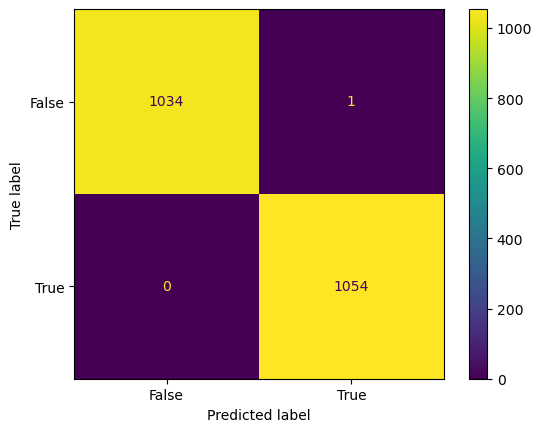

In [225]:
from sklearn import metrics

confusion_matrix = metrics.confusion_matrix(y_test, y_pred2)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.show()

In [226]:
import pickle
pickle.dump((xgbc_model), open('xgbc_model.pkl', 'wb'))